In [190]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [191]:
data = pd.read_csv("Individuals.csv")
data.head()

,year,category,film,name,result,gender,birthday
0,1930,Actor,In Old Arizona,Warner Baxter,Winner,Male,1889
1,1930,Actor,Thunderbolt,George Bancroft,Nominee,Male,1882
2,1930,Actor,Alibi,Chester Morris,Nominee,Male,1901
3,1930,Actor,The Valiant,Paul Muni,Nominee,Male,1895
4,1930,Actor,The Patriot,Lewis Stone,Nominee,Male,1879


In [192]:
hashmap = {}
for names in data["name"]:
    if hashmap.get(names) == None:
        hashmap[names] = 1
    else:
        hashmap[names] = hashmap[names] + 1

number_of_nomination = []

for names in data["name"]:
   number_of_nomination.append(hashmap.get(names))

data["Number of nominations"] = number_of_nomination

In [193]:
data["Age when nominated"] = data["year"] - data["birthday"]
for index_names in range(len(data["name"])):
    
    if data.loc[:,"result"][index_names] == "Nominee":
        data.loc[index_names:index_names, "Age when winner"] = np.nan
    if data.loc[:,"result"][index_names] == "Winner":
        data.loc[index_names:index_names, "Age when winner"] = data["year"][index_names] - data["birthday"][index_names]
data["Age when winner"] = data["Age when winner"].astype("Int64")

In [194]:
data.head()

,year,category,film,name,result,gender,birthday,Number of nominations,Age when nominated,Age when winner
0,1930,Actor,In Old Arizona,Warner Baxter,Winner,Male,1889,1,41,41
1,1930,Actor,Thunderbolt,George Bancroft,Nominee,Male,1882,1,48,<NA>
2,1930,Actor,Alibi,Chester Morris,Nominee,Male,1901,1,29,<NA>
3,1930,Actor,The Valiant,Paul Muni,Nominee,Male,1895,6,35,<NA>
4,1930,Actor,The Patriot,Lewis Stone,Nominee,Male,1879,1,51,<NA>


In [ ]:
ax = data.hist(column='Age when winner', by='gender', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Age when winner (year)", labelpad=20, weight='bold', size=12)
    plt.xlim(0, 90)


    # Set y-axis label
    if i == 1:
        x.set_ylabel("N", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

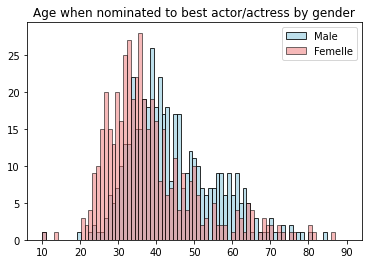

In [197]:
actor = data[data["gender"] == "Male"]
actor = actor[(actor["category"] == "Actor") | (actor["category"] == "Actor in a Leading Role")]
actor = actor[["Age when nominated"]]
actress = data[data["gender"] == "Female"]
actress = actress[(actress["category"] == "Actress") | (actress["category"] == "Actress in a Leading Role")]
actress = actress[["Age when nominated"]]

actor = actor.stack()
actress = actress.stack()


bins = np.linspace(10, 90, 80)

plt.hist(actor, bins=bins, color = "lightblue",alpha = 0.8, label= "Male", edgecolor = "black")

plt.hist(actress,  bins=bins, color="lightcoral", alpha=0.55, label = "Femelle", edgecolor = "black")
pyplot.legend(loc='upper right')

plt.title('Age when nominated to best actor/actress by gender')
plt.savefig("two_histograms_01.png", bbox_inches='tight',dpi=400)

plt.show()



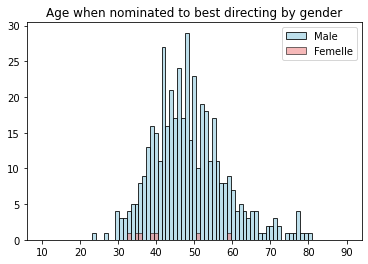

In [198]:
maledirecting = data[data["gender"] == "Male"]
maledirecting = maledirecting[maledirecting["category"] == "Directing"]
maledirecting = maledirecting[["Age when nominated"]]
femaledirecting = data[data["gender"] == "Female"]
femaledirecting = femaledirecting[femaledirecting["category"] == "Directing"]
femaledirecting = femaledirecting[["Age when nominated"]]

maledirecting = maledirecting.stack()
femaledirecting = femaledirecting.stack()

bins = np.linspace(10, 90, 80)

plt.hist(maledirecting, bins=bins, color = "lightblue",alpha = 0.8, label= "Male", edgecolor = "black")

plt.hist(femaledirecting,  bins=bins, color="lightcoral", alpha=0.55, label = "Femelle", edgecolor = "black")
pyplot.legend(loc='upper right')

plt.title('Age when nominated to best directing by gender')
plt.savefig("two_histograms_03.png", bbox_inches='tight',dpi=400)

plt.show()

In [221]:
list_category = []
blabla = ""
while blabla != "Stop":
    blabla = input("Write one category you want to search then press enter. When you're done, write 'Stop'")
    if blabla != "Stop":
        list_category.append(blabla)
        

In [224]:
"belle gosse" in list_category

True